In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score

from sklearn.linear_model import LogisticRegression,SGDClassifier

In [2]:
url = 'https://raw.githubusercontent.com/umbertogriffo/Fashion-mnist-cnn-keras/master/Dataset/fashion-mnist_test.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.to_csv('fashion_mnist.csv')

In [7]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(10000, 785)

In [10]:
df = df.sample(frac=0.3).reset_index(drop=True)

In [11]:
df.shape

(3000, 785)

In [12]:
LOOKUP = {
0:'T-shirt/top',
1:	'Trouser',
2:	'Pullover',
3:	'Dress',
4:	'Coat',
5:	'Sandal',
6:	'Shirt',
7:	'Sneaker',
8:	'Bag',
9:	'Ankle boot',
}

In [13]:
def  display_image(features,actual_label):
    print('Actual label',LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))

In [22]:
X = df[df.columns[1:]]
y = df['label']

In [15]:
X.loc[5].values[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
y.loc[5]

7

Actual label Sneaker


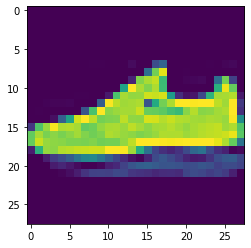

In [17]:
display_image(X.loc[5].values,y.loc[5])

Actual label T-shirt/top


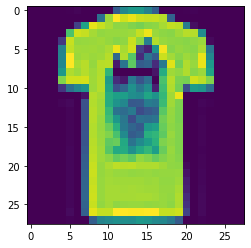

In [18]:
display_image(X.loc[1115].values,y.loc[1115])

In [23]:
X = X/255.
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003922,0.011765,0.0,0.207843,0.72549,0.67451,0.227451,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.0


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
X_train.shape,y_train.shape

((2400, 784), (2400,))

In [26]:
X_test.shape,y_test.shape

((600, 784), (600,))

In [28]:
def summarize_classification(y_test,y_pred,avg_mehod='weighted'):
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc = accuracy_score(y_test,y_pred,normalize=False)

    prec = precision_score(y_test,y_pred,average='weighted')
    recall = recall_score(y_test,y_pred,average='weighted')

    print('Test data count: ', len(y_test))
    print('accuracy_count: ',num_acc)
    print('acc_score: ',acc)
    print('precision_score: ',prec)
    print('recall_score: ',recall)

In [30]:
logistic_model = LogisticRegression(solver='sag',multi_class='auto',max_iter=1000).fit(X_train,y_train)

In [31]:
y_pred = logistic_model.predict(X_test)
y_pred

array([3, 8, 4, 0, 6, 9, 9, 7, 4, 6, 4, 0, 8, 2, 4, 6, 6, 0, 0, 6, 6, 6,
       6, 4, 5, 2, 7, 3, 7, 0, 4, 4, 7, 8, 3, 3, 8, 7, 1, 4, 0, 9, 2, 1,
       9, 1, 9, 4, 8, 6, 1, 0, 8, 8, 7, 3, 4, 1, 6, 9, 2, 8, 3, 7, 7, 4,
       6, 2, 5, 8, 9, 8, 8, 4, 8, 6, 7, 3, 7, 1, 7, 5, 7, 6, 7, 7, 2, 4,
       4, 4, 9, 1, 3, 5, 0, 5, 5, 3, 1, 2, 0, 7, 5, 8, 3, 7, 4, 0, 9, 4,
       4, 7, 9, 5, 7, 7, 7, 8, 3, 2, 0, 6, 0, 7, 5, 8, 8, 8, 9, 6, 1, 2,
       9, 4, 4, 9, 6, 4, 1, 0, 5, 3, 0, 3, 1, 9, 9, 4, 5, 6, 9, 1, 2, 5,
       1, 9, 0, 4, 8, 7, 9, 6, 7, 2, 9, 5, 0, 8, 8, 2, 3, 8, 3, 1, 0, 4,
       7, 9, 6, 3, 8, 7, 2, 6, 3, 7, 4, 8, 6, 3, 0, 0, 9, 0, 5, 0, 3, 5,
       4, 3, 9, 3, 9, 4, 5, 2, 0, 2, 3, 7, 4, 3, 1, 0, 1, 8, 1, 1, 7, 9,
       1, 3, 2, 6, 6, 0, 4, 4, 9, 7, 8, 7, 9, 3, 3, 1, 1, 5, 3, 0, 2, 5,
       5, 6, 6, 1, 3, 8, 3, 1, 8, 4, 3, 5, 0, 6, 1, 2, 5, 5, 7, 0, 3, 3,
       6, 9, 3, 8, 0, 7, 3, 7, 5, 5, 4, 3, 3, 7, 5, 6, 4, 5, 8, 6, 1, 6,
       0, 8, 4, 3, 1, 6, 3, 7, 8, 2, 3, 4, 4, 1, 6,

In [32]:
summarize_classification(y_test,y_pred)

Test data count:  600
accuracy_count:  501
acc_score:  0.835
precision_score:  0.8428905630660505
recall_score:  0.835
